In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
df = pd.read_csv('FuelConsumption.csv')
print(df.head())
df.shape

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

(1067, 13)

In [39]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [40]:
object_cols = df.select_dtypes(include=['object']).columns
print("Categorical Variables: ",len(object_cols))

int_cols = df.select_dtypes(include=['int64']).columns
print("Integer Variables: ",len(int_cols))

float_cols = df.select_dtypes(include=['float64']).columns
print("Float Variables: ",len(float_cols))



Categorical Variables:  5
Integer Variables:  4
Float Variables:  4


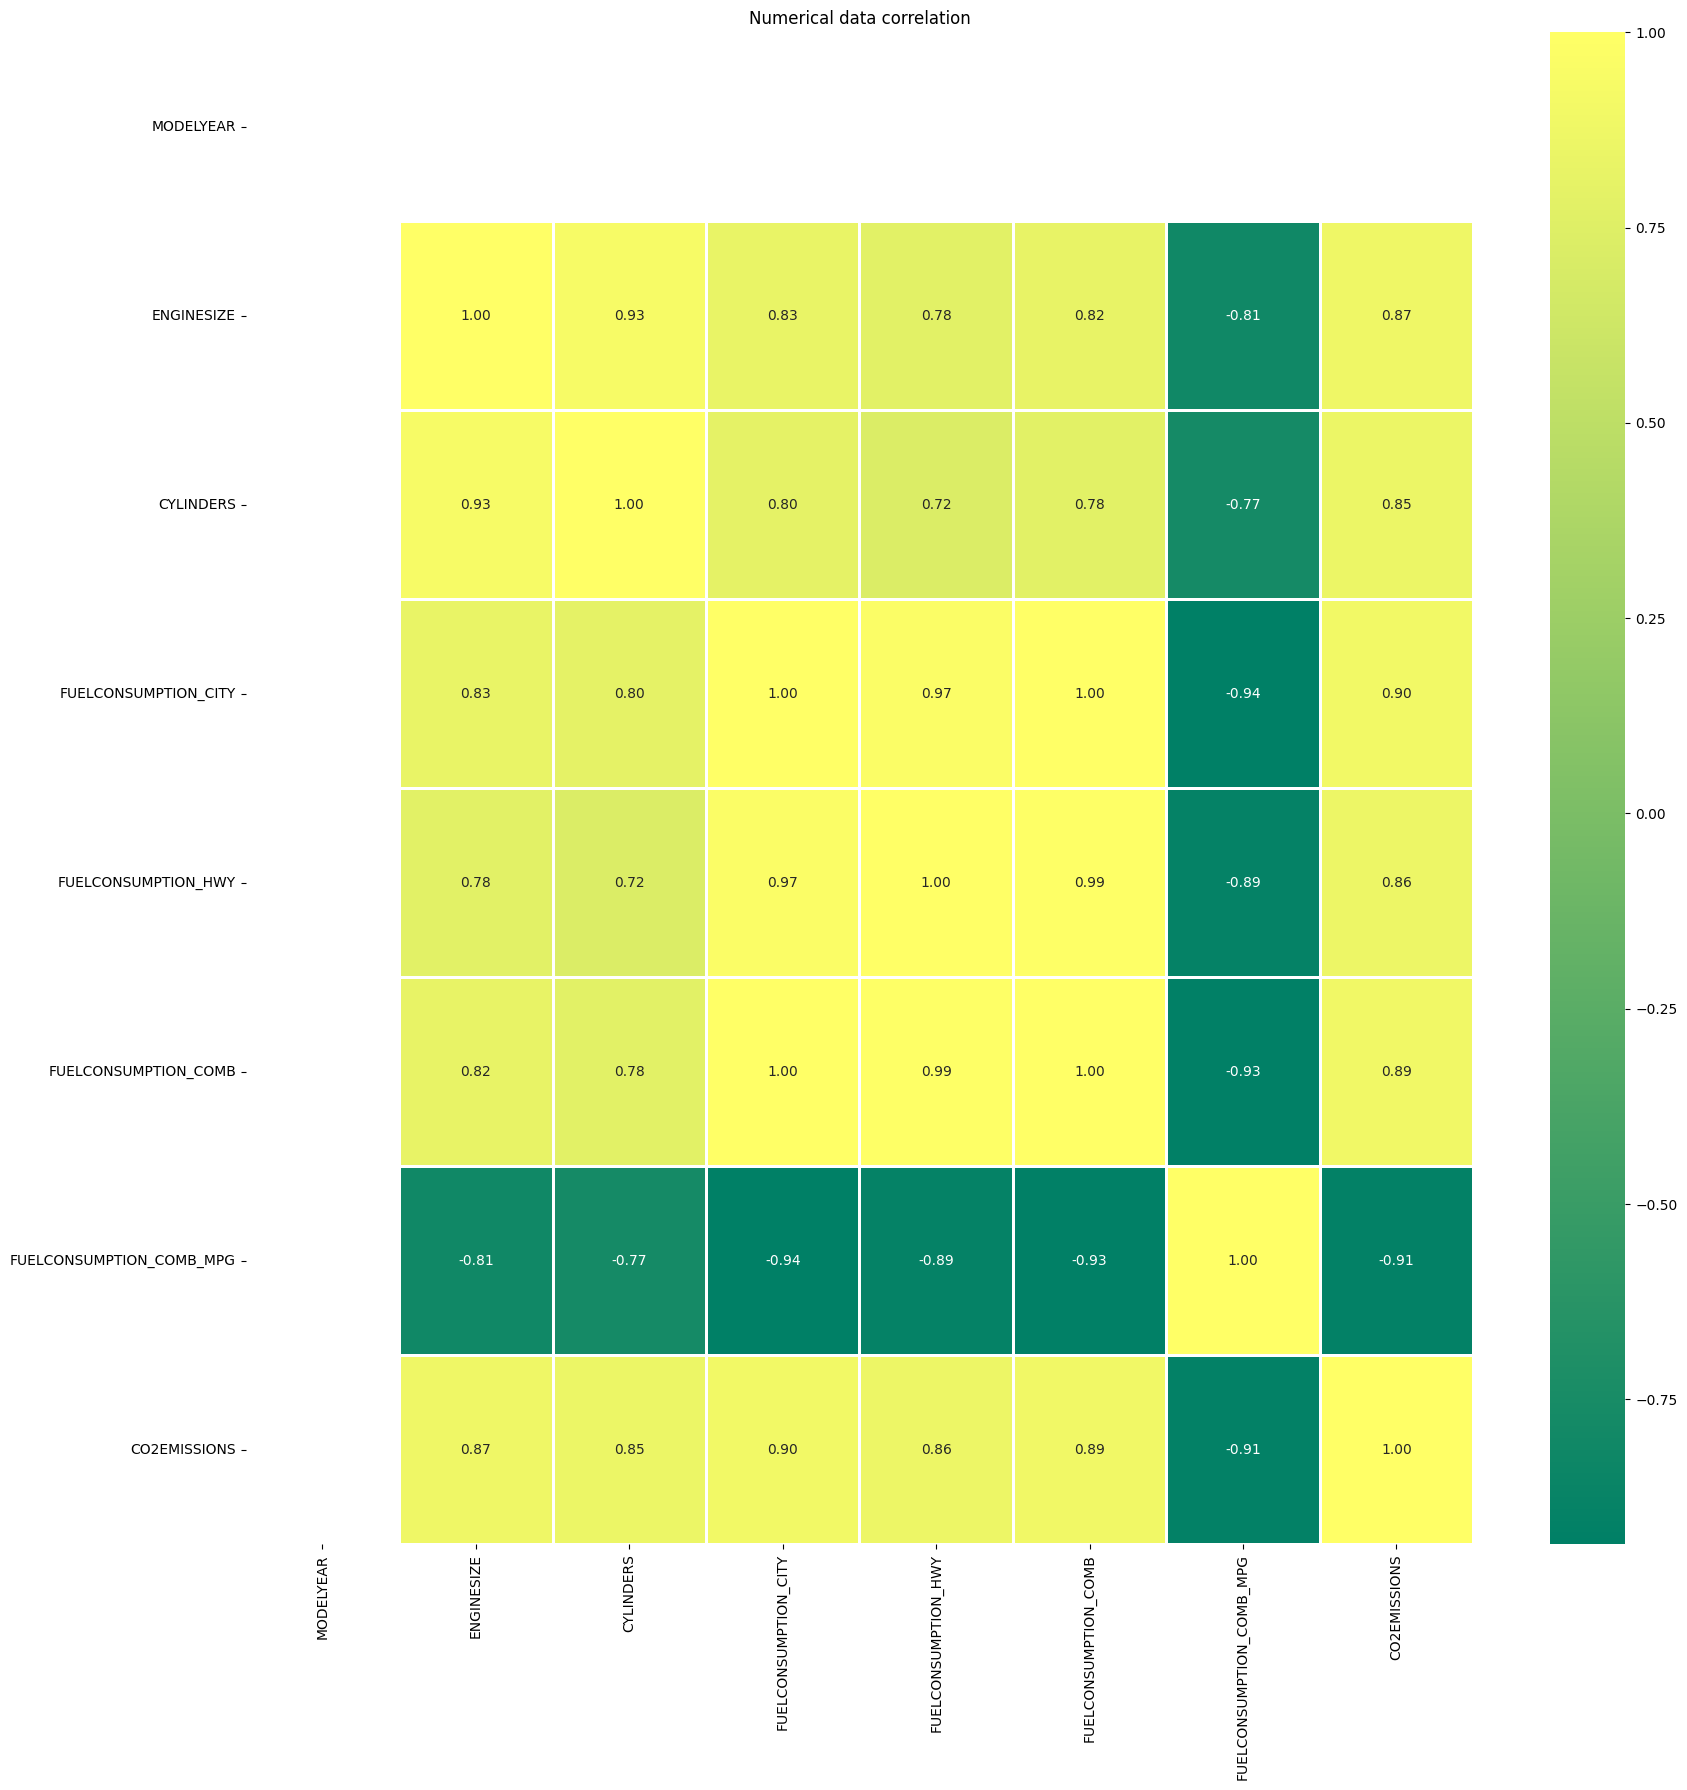

In [41]:
num_cols = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(18,18))
sns.heatmap(
    num_cols.corr(),
    annot=True,
    cmap='summer',
    fmt='.2f',
    linewidths=2
)
plt.title("Numerical data correlation")
plt.tight_layout()
plt.show()

In [42]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


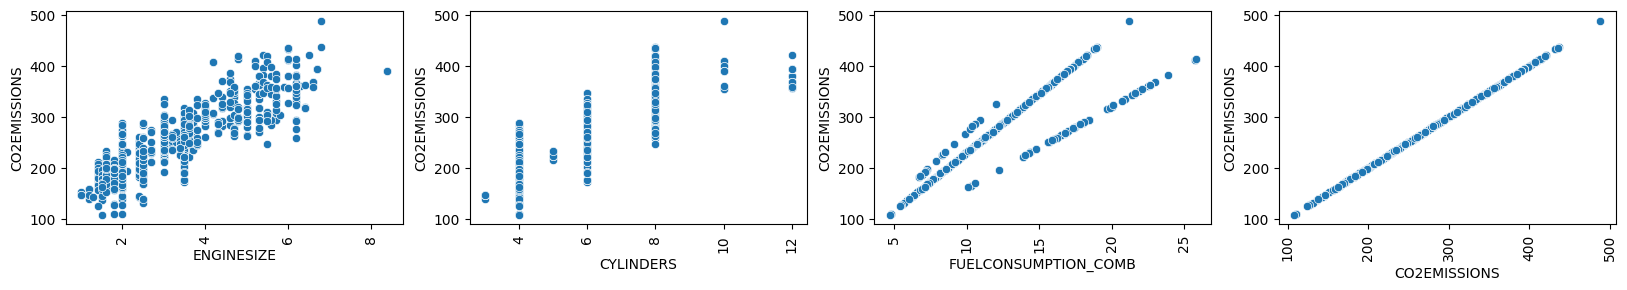

In [43]:
plt.figure(figsize=(20,36))
index=1
for col in cdf.columns:
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.scatterplot(x=cdf[col],y=cdf['CO2EMISSIONS'])
    index+=1

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mae

x=cdf.drop(['CO2EMISSIONS'],axis=1)
y=cdf['CO2EMISSIONS']


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)




In [47]:
from sklearn.linear_model import LinearRegression


model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)
print("Mean Absolute Percentage Error: ",mae(y_test,y_pred))

print("Coefficients: ",model_lr.coef_)
print("Intercept: ",model_lr.intercept_)

Mean Absolute Percentage Error:  0.07226174045837865
Coefficients:  [10.72727032  7.91634736  9.45426925]
Intercept:  66.42093694930622


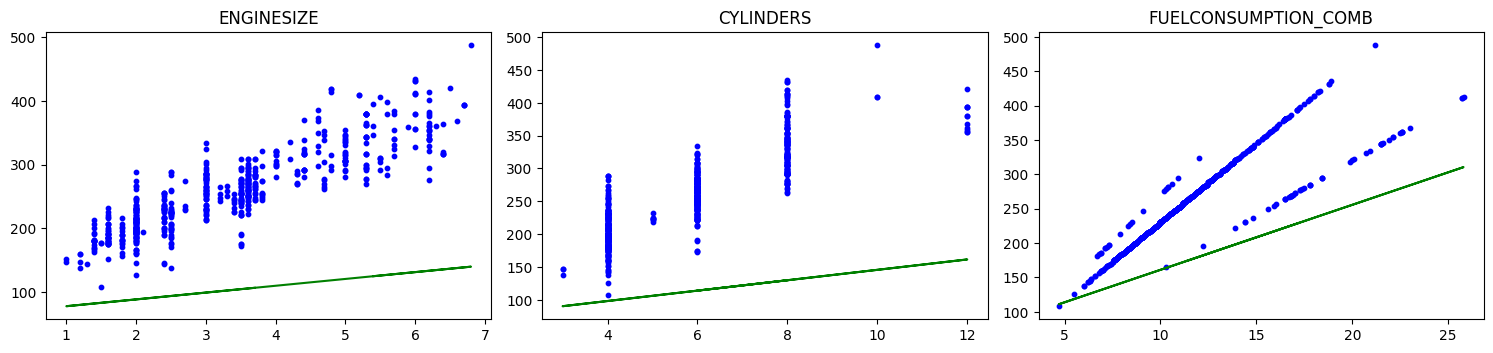

In [52]:
plt.figure(figsize=(20,36))

for i,cols in enumerate(x.columns,start=1):
    plt.subplot(11,4,i)
    plt.scatter(x_train[cols],y_train,color='blue',s=10)
    plt.plot(x_train[cols],model_lr.coef_[i-1]*x_train[cols]+model_lr.intercept_,color='green')
    plt.title(cols)
plt.tight_layout()

C:\Users\durga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\durga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\durga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


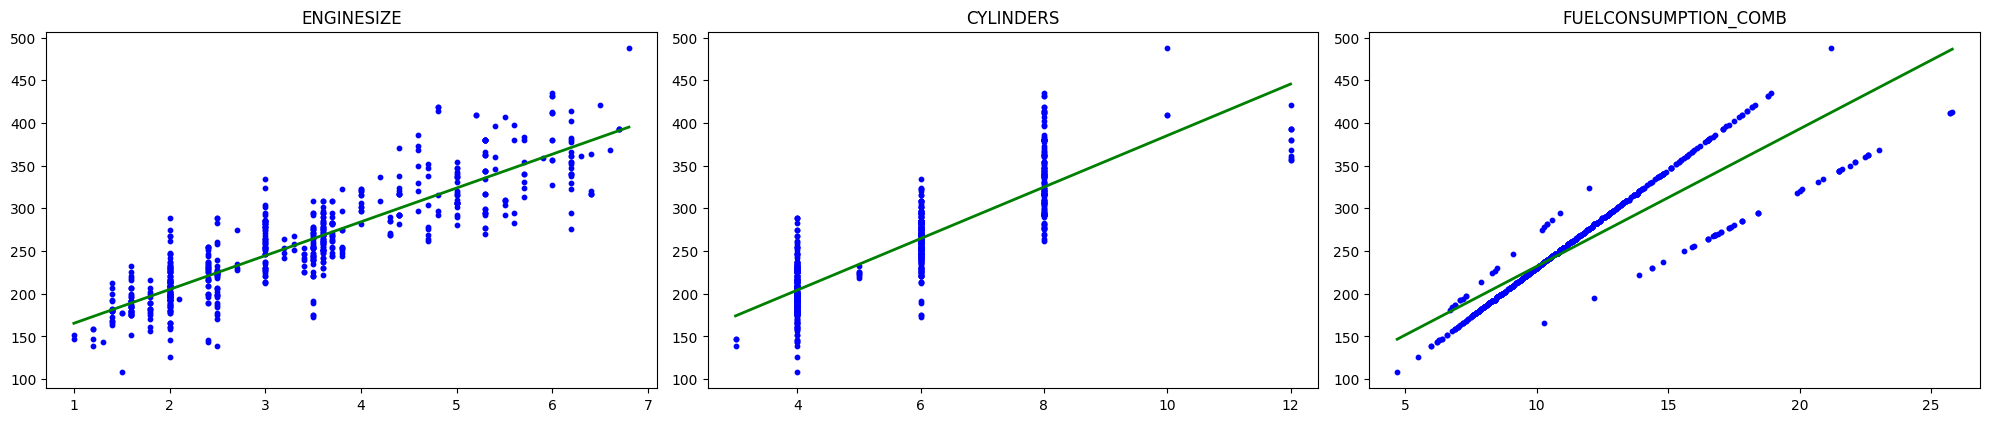

In [54]:
plt.figure(figsize=(20, 12))

for i, col in enumerate(x.columns, start=1):
    plt.subplot(3, 3, i)  # adjust grid to number of columns
    plt.scatter(x_train[col], y_train, color='blue', s=10)

    lr1 = LinearRegression()
    X_col = x_train[[col]]
    lr1.fit(X_col, y_train)

    xs = np.linspace(X_col.min().item(), X_col.max().item(), 100)
    ys = lr1.predict(xs.reshape(-1, 1))
    plt.plot(xs, ys, color='green', linewidth=2)

    plt.title(col)

plt.tight_layout()